In [1]:
import numpy as np
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *

Nx = 6
Ny = 3
xarr=  np.linspace(-4, 4, Nx)
yarr = np.linspace( -2, 2, Ny)


In [2]:
source_array = PositionArray.from_arrays(xarr, yarr)

In [3]:
Utils.print_mesh_point(source_array)

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.0)(-2.4, 0.0)(-0.8, 0.0)(0.8, 0.0)(2.4, 0.0)(4.0, 0.0):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):



In [4]:
mesh_x, mesh_y = np.meshgrid(xarr, yarr, indexing="ij")
mesh_xt, mesh_yt = np.meshgrid(xarr, yarr, indexing="xy")

In [5]:
p = PositionArray.from_meshgrid(mesh_x, mesh_y, indexing="ij")
Utils.print_mesh_point(p)

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.0)(-2.4, 0.0)(-0.8, 0.0)(0.8, 0.0)(2.4, 0.0)(4.0, 0.0):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):



In [6]:
puniform = PositionArray.uniform((2, 1), (Nx, Ny))
xarr_m = puniform.get_axis_list("x")
yarr_m = puniform.get_axis_list("y")
xarr_mesh, yarr_mesh = np.meshgrid(xarr_m, yarr_m, indexing="xy")
m = PositionArray.from_meshgrid(xarr_mesh, yarr_mesh, indexing="xy")
Utils.print_mesh_point(m)

(-5.0, -1.0)(-3.0, -1.0)(-1.0, -1.0)(1.0, -1.0)(3.0, -1.0)(5.0, -1.0):

(-5.0, 0.0)(-3.0, 0.0)(-1.0, 0.0)(1.0, 0.0)(3.0, 0.0)(5.0, 0.0):

(-5.0, 1.0)(-3.0, 1.0)(-1.0, 1.0)(1.0, 1.0)(3.0, 1.0)(5.0, 1.0):



In [7]:
Utils.print_mesh_point(puniform)

(-5.0, 1.0)(-3.0, 1.0)(-1.0, 1.0)(1.0, 1.0)(3.0, 1.0)(5.0, 1.0):

(-5.0, 0.0)(-3.0, 0.0)(-1.0, 0.0)(1.0, 0.0)(3.0, 0.0)(5.0, 0.0):

(-5.0, -1.0)(-3.0, -1.0)(-1.0, -1.0)(1.0, -1.0)(3.0, -1.0)(5.0, -1.0):



In [8]:
puniform[0][5]

PositionArray([5., 1.])

In [9]:
s = 2
h = 1

In [10]:
lamber_pattern = lambda d: Radiation.lambertian(s, h, d)

In [11]:
X, Y = Utils.plane_meshgrid((-2, 2), (-6, 6), (300, 400))

In [12]:
Z = puniform.intensity_on((X,Y), lamber_pattern)

In [13]:
Z_sources = puniform.intensity_on((X,Y), lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.001, 0))

In [14]:
import matplotlib.pyplot as plt

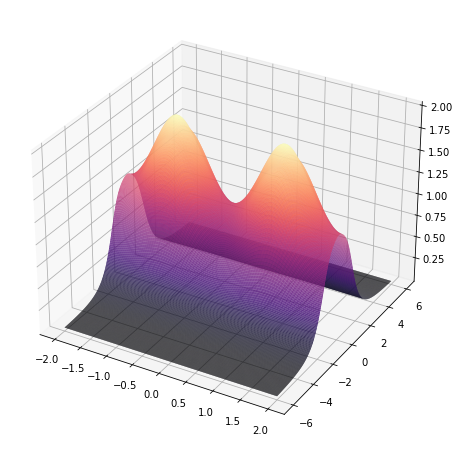

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, 2* Z/Z.max(), rstride= 1, cstride =1, cmap='magma', edgecolor='none')
#ax.plot_surface(X, Y, Z_sources/Z_sources.max())

# Test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *

In [20]:
# optical system
s = 3
Wx = 0.7
Wy = 0.3
H = 0.1

In [21]:
math.sqrt((Wx - 0.7141721110454886* H)**2 + (Wy - 0.7141721110454886*H)**2)

0.6688545536025046

In [22]:
print(Wx/H, Wy/H)

6.999999999999999 2.9999999999999996


In [23]:
# ESC
n_x = ESC.get_nmax(s, Wx, H)[0]
n_y = ESC.get_nmax(s, Wy, H)[0]
n_r = ESC.get_nmax(s, [Wx, Wy], H)[1:3]


Inital point: [2, 1]
[array([2, 1]), array([3, 1]), array([4, 2]), array([4, 1]), array([3, 2]), array([5, 2]), array([6, 3]), array([6, 2]), array([5, 3]), array([7, 3])]
[0.6872824349107032, 0.6340427116193481, 0.5500301265778919, 0.5872446409566362, 0.5997391365990875, 0.5129214425668177, 0.4461528639271336, 0.4707250225185988, 0.490467876022552, 0.417376758429126]


In [24]:
c_x = ESC.coefficient(s, n_x)[0]
c_y = ESC.coefficient(s, n_y)[0]

c_xy = ESC.coefficient(s, *n_r, shape="R")

In [25]:
print( c_x, c_y, c_xy)

0.37548731179451567 0.5232034770509533 (0.5636265488525615, 0.5636265488525615)


In [26]:
esc_array = PositionArray.uniform((H*c_x, H*c_y), (n_x, n_y))
esc_array_2 = PositionArray.uniform((H*c_xy[0], H*c_xy[0]), (n_r[0], n_r[1]))

In [27]:
print(esc_array.shape)
print(esc_array_2.shape)

(7, 19, 2)
(3, 7, 2)


In [28]:
X, Y = Utils.plane_meshgrid((-Wx/2, Wx/2), (-Wy/2, Wy/2), (200, 300))
Z = esc_array.intensity_on((X,Y), lambda d: Radiation.lambertian(s, H, d))
Z2 = esc_array_2.intensity_on((X,Y), lambda d: Radiation.lambertian(s, H, d))

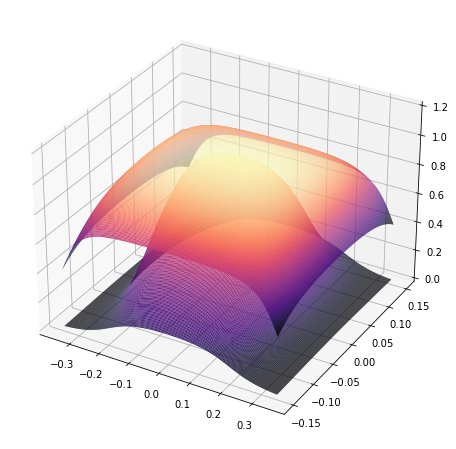

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    X, Y, Z/Z.max(), 
    rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax.plot_surface(
    X, Y, Z2/Z2.max(), 
    rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax.set_zlim(0, 1.2)
plt.show()

In [17]:
Z.min()/Z.max()

0.5622242286835829

In [18]:
Z2.min()/Z2.max()

0.5407738313336059

In [13]:
print(f"{Z.max()}, {Z2.max()}")

532.8674057391701, 473.3959873448228


In [14]:
h =0.01

<Figure size 1152x1152 with 0 Axes>

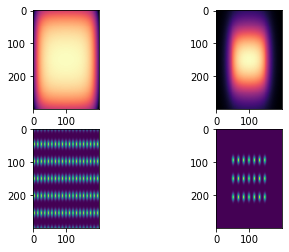

In [30]:
fig = plt.figure(figsize=(16,16))
f, axes = plt.subplots(2,2) 
axes[0][0].imshow(Z, interpolation='nearest', cmap='magma')
axes[1][0].imshow(esc_array.intensity_on((X, Y), lambda d: Radiation.dirac(d, h)))

axes[0][1].imshow(Z2,
           interpolation='nearest', cmap='magma')
axes[1][1].imshow(esc_array_2.intensity_on((X, Y), lambda d: Radiation.dirac(d, h)))
plt.show()

In [1]:
import numpy as np
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *
from matplotlib import pyplot as plt

In [2]:
s = 2
N = 51
N = N if N % 2 else N +1
d = int((N-1)/2)+1
pos = PositionArray.uniform(1, (N, N)) + d
xpos, ypos = pos.to_meshgrid()

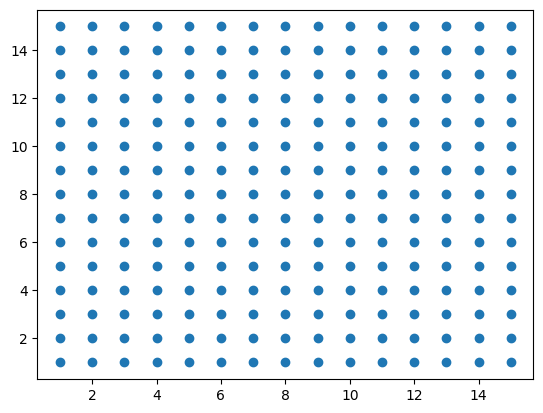

In [13]:
n =15
plt.scatter(xpos[:n, :n], ypos[-n :, -n :])
plt.show()

In [4]:
Z = np.array([[ ESC.coefficient(s, cor[0], cor[1], shape="R")[0] for cor in line] for line in pos.astype(int)])

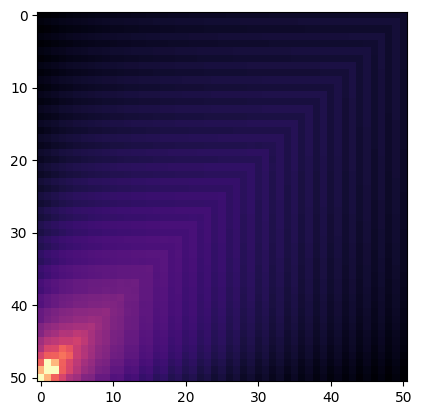

In [5]:
plt.imshow(Z, cmap="magma")
plt.show()

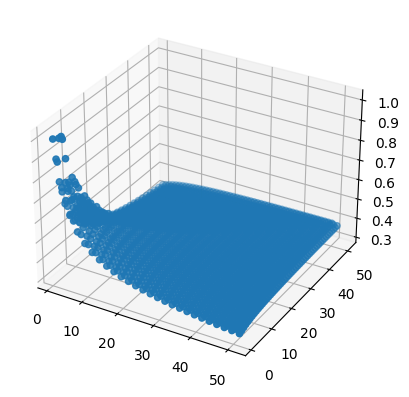

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xpos, ypos, Z, marker="o")
plt.show()

In [7]:
Z_x = np.array([[ cor[0]*ESC.coefficient(s, cor[0], cor[1], shape="R")[0] for cor in line] for line in pos.astype(int)])

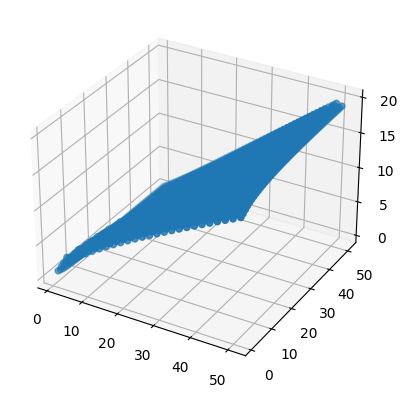

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xpos, ypos, Z_x, marker="o")
plt.show()

# Rectangular search

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *

In [2]:
s = 2
N = 51
N = N if N % 2 else N +1
d = int((N-1)/2)+1
pos = PositionArray.uniform(1, (N, N)) + d
xpos, ypos = pos.to_meshgrid()
alpha = 7.2
shift = -56
alpha2 = -7.2
shift2 = 64

In [29]:
pi = [15, 16]
slopes = [0, 0.1, 0.3, 0.2]
shifts = [pi[1] - slope*pi[0] for slope in slopes ]

In [30]:
def line(x, slope, zero_value):
    return slope * x + zero_value

In [31]:
n =30
x = 1.2*n
line_points = [[[0, x], [line(0, slope, shift), line(x, slope, shift)]] for slope, shift in zip(slopes, shifts)]
p_range = (30, 30)
int_points = [UtilsAlgorithm.line_points(pi, line_param=[slope, shift], p_range=p_range) for slope, shift in zip(slopes, shifts)]
points = [[p[0][:-1, 0], p[0][:-1, 1]] for p in int_points]


In [32]:
int_points[0][0][:-1, 0]

array([ 15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  14,  13,  12,  11,  10,   9,   8,   7,
         6,   5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,
        -7,  -8,  -9, -10, -11, -12, -13, -14])

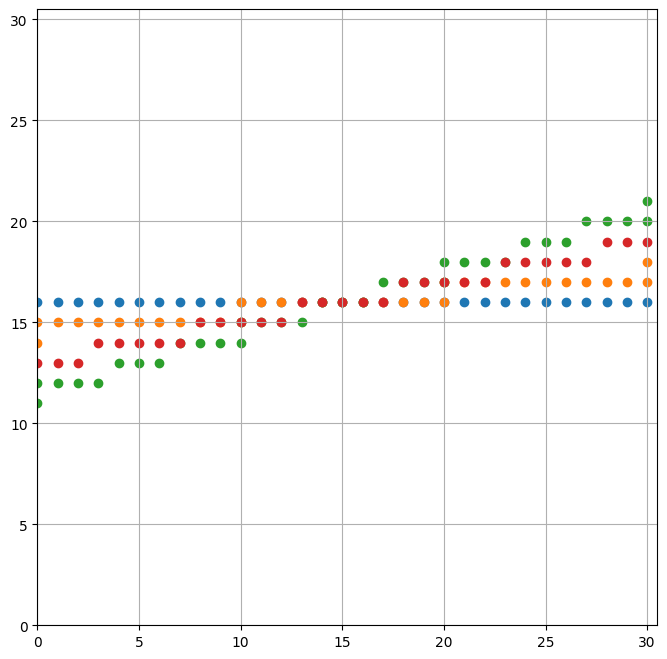

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
#ax.scatter(xpos[:n, :n], ypos[-n :, -n :], edgecolors=None)
#for l_p in line_points:
#    ax.plot(l_p[0], l_p[1])
for point in points:
    ax.scatter(point[0], point[1])
ax.set_xlim(0, n+0.5)
ax.set_ylim(0, n+0.5)
ax.grid()
plt.show()

In [57]:
slope =0
dir = True
f = lambda x, y : UtilsAlgorithm.line_plane_determinator((x,y), slope, 0)
p1, p2, p3 = UtilsAlgorithm.line_next_points([0,0], slope, dir)
pd = [(p1[0] + p2[0])/2, (p1[1] + p2[1])/2]
print(p1, p2 ,p3 )
print("pd:", pd)
slope_cor  = (-1 if math.fabs(slope)>=1 else 1)
D = (slope_cor) * f(*pd)
print(f"D':{D},slope:{slope_cor} D:{f(*pd)}")
print(f"D:{D}")
if D == 1:
    print(f"p1:{p1}")
elif D == -1:
    print(f"p2:{p2}")
else:
    p_ = [p1[0] + (p2[0]- p[0]), p1[1] + (p2[1]- p[1])]
    print(p_)

[1, 1] [1, 0] [0, 1]
pd: [1.0, 0.5]
D':1,slope:-1 D:-1
D:1
p1:[1, 1]


In [61]:
UtilsAlgorithm.line_slope_cor(0+EPS)

-1

In [62]:
if slope >= 0 :
    if slope < 1:
        result = 1
    else:
        result = -1
else:
            if slope > -1:
                result = -1
            else:
                result = 1

In [63]:
result

-1

In [59]:
(-1 if math.fabs(slope)>=1 else 1)

1

In [25]:
def slope_cor(slope):
    if slope >= 0 :
        if slope >= 1:
            result = -1
        else:
            result = 1
    else:
        if slope > -1:
            result = -1
        else:
            result = 1
    return result 

In [26]:
per = [-2, -1, -0.5, 0, 0.2, 1, 1.2, 3]
for num in per:
    print(f"{num}: {slope_cor(num)}")


-2: 1
-1: 1
-0.5: -1
0: 1
0.2: 1
1: -1
1.2: -1
3: -1


In [26]:
math.fabs(math.fabs(slope) -1) <EPS

True

## Bresenham's line algorithm

To get a sequence of points close to the ratio of the given region $W_x \times W_y$.

In [132]:
def plane_determinator(point, m, d, dx = 10):
    a = m* dx
    b = - dx
    c = dx* d

    x, y = point

    return 1 if (a*x + b*y + c) >=0 else -1
def next_points(pi, m, dir = True):
    xi, yi = pi
    dx = 1 if dir else -1
    dy = (1 if dir else -1) * (1 if m>0 else -1)
    #-----------------------
    pf1 = [xi + dx, yi +dy]
    if math.fabs(m) > 1:
        # y
        pf2 = [xi, yi+dy]
    else:
        # x
        pf2 = [xi +dx, yi]

    return pf1, pf2
f  = lambda x, y: plane_determinator((x,y), m, d)

In [133]:
Wx, Wy = 0.2, alpha*Wx
upper = False
if Wy > Wx:
    upper = True
m = Wy/Wx
d= 0

In [134]:
p_i = [0, 0]
m = alpha
ra_cor = (-1 if math.fabs(m)>1 else 1)
p = p_i
pf = None

x_points = []
y_points = []
for i in range(0, 16):
    #print(f"{p} ->", end="")
    p1, p2 = next_points(p, m, dir = True)
    #print(p1, p2)
    pm = [(p1[0] + p2[0])/2, (p1[1] + p2[1])/2]
    D_pm = ra_cor * f(*pm)

    if D_pm ==1 :
        pf = p1
        #print("pick p1")
    else:
        pf = p2
        #print("pick p2")
    x_points.append(p[0])
    y_points.append(p[1])

    p = pf

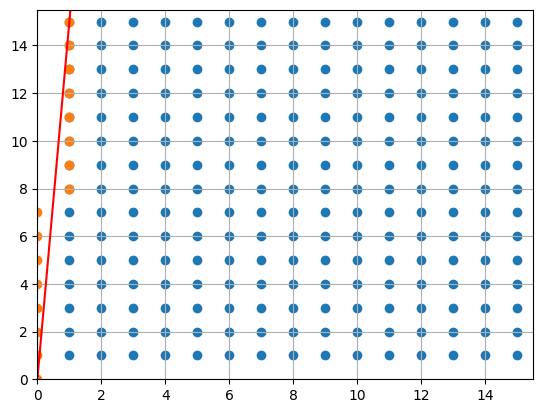

In [138]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xpos[:n, :n], ypos[-n :, -n :])
ax.scatter(x_points, y_points)
ax.plot(px, py, 'r')
ax.set_xlim(0, n+0.5)
ax.set_ylim(0, n+0.5)
ax.grid()
plt.show()